In [1]:
import json
import os
from os import listdir
from os.path import isfile, join
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
import numpy as np
import math

from itertools import cycle, islice


In [112]:

fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 16, # fontsize for x and y labels (was 10)
    'axes.titlesize': 16,
    'legend.fontsize': 16, # was 10
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': True,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
    'lines.linewidth': 2
}

matplotlib.rcParams.update(params)

In [157]:
data_dir = 'aggregated_data'
out_dir = 'final_plots'


appname = 'LUBM'
data_size_dir = 'LUBM'
collections = ['schemex', 'attribute', 'type']
suffix = ''
hide_legend = False

appname = 'BSBM'
data_size_dir = 'BSBM'
collections =['schemex', 'attribute', 'type']
suffix = ''
hide_legend = True


appname = 'dyldo_y2019_core'
data_size_dir = 'DyLDO-core'
collections =['schemex', 'attribute', 'type']
suffix = ''
hide_legend = True


appname = 'dyldo_y2019_full'
data_size_dir = 'DyLDO-ext'
collections =['schemex', 'attribute', 'type']
suffix = ''
hide_legend = True


ticks = 5.0
interpolate = True

drop the beat


,SchemEX:changes,SchemEX:updates,AttrColl:changes,AttrColl:updates,TypeColl:changes,TypeColl:updates
0,7271943,234467,7271943.0,50207.0,7271943.0,42300.0
1,452754,57802,329152.0,16049.0,288916.0,11857.0
2,632964,96741,521971.0,12951.0,543112.0,19435.0
3,3784554,125828,3642298.0,18634.0,3660126.0,13963.0
4,1527781,59095,1403436.0,18475.0,239004.0,3723.0


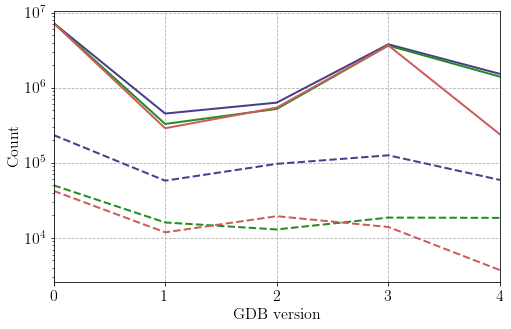

In [158]:
iterations = 0
plot_frame = pd.DataFrame() 
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-changes.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()
        iterations = max(iterations, len(df))
        f2 = open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r')
        df2 = pd.read_csv(f2, sep=',')
        df2.head()
        
        df2['Imprint links add-del'] = (df2['Imprint links'] - df2['Imprint links'].shift(1,fill_value=0)).abs()
        
        #plot_frame[collection+':change-ratio'] = ((df['ChangedSchemaStructures (SE_mod)'] +  df2['Imprint links add-del']) / (df2['Imprint links'].shift(1,fill_value=0)))
        plot_frame[collection+':changes'] = df['ChangedSchemaStructures (SE_mod)'] +  df2['Imprint links add-del']
        #plot_frame[collection+':update-ratio'] = (df['NewlyObservedSchema (SE_new)'] + df['DeletedSchemaStructures (SE_del)']) / df2['Schema Elements (SE)']
        plot_frame[collection+':updates'] = df['NewlyObservedSchema (SE_new)'] + df['DeletedSchemaStructures (SE_del)']

        
plot_frame.columns = ['SchemEX:changes', 'SchemEX:updates', 
                      'AttrColl:changes', 'AttrColl:updates', 
                      'TypeColl:changes', 'TypeColl:updates']

# this leads to line chart interpolating
# if appname == 'dyldo_y2019_core':
#     plot_frame = plot_frame.drop(plot_frame.index[[21,22]])

if appname == 'dyldo_y2019_core':
    if interpolate:
        plot_frame = plot_frame.drop(plot_frame.index[[21,22]])
    else:
        plot_frame.loc[21:22,'SchemEX:changes':'TypeColl:updates']=np.nan,np.nan,np.nan,np.nan,np.nan,np.nan
    display(plot_frame)

if appname == 'dyldo_y2019_full':
    plot_frame = plot_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')
    
    
display(plot_frame)
ax = plot_frame.plot(logy=True, style=['-','--','-','--','-','--'], color=['darkslateblue', 'darkslateblue', 'forestgreen', 'forestgreen', 'indianred', 'indianred'])
ax.set_xlabel("GDB version")
ax.set_ylabel("Count")
plt.xticks(np.arange(0, iterations, ticks))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=2)
plt.grid(True)

if hide_legend:
    ax.get_legend().remove()

plt.savefig(out_dir + '/' + appname + '-change-ratio.pdf', bbox_inches = 'tight')


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,2728945,3082756,2919880,276045,23334307,32341933,34569531.0
1,1,2948153,2728774,2671620,344435,21352318,30045300,39964720.0
2,2,2766562,2965160,2716196,278444,14232603,22958965,33962091.0
3,3,3986864,112183,7180263,425795,21872700,33577805,45877172.0
4,4,4248701,108713,7677098,341151,21941885,34317548,37394280.0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,2764931,2641187,3025499,247040,22389475,31068132,32289964.0
1,1,2908053,2563019,2779098,273538,15762909,24286617,39575884.0
2,2,2945038,2615385,2840614,248896,8402948,17052881,36164709.0
3,3,3543288,4178263,3887617,537948,13972579,26119695,40691185.0
4,4,4542920,4206853,3812291,395463,17226868,30184395,40683924.0


,Iteration,Load Graph,Parse Graph,Partition Graph,Schema Computation,Updates,Total,Batch
0,0,5286785,5695303,5868092,504889,1067804,18422873,62985069
1,1,2552077,2686492,3007034,323189,615491,9184283,55412381
2,2,2622036,2981925,2879381,306093,571810,9361245,56750178
3,3,4186488,130712,7546666,432150,855957,13151973,94560702
4,4,3551688,4088867,4072143,409007,767276,12888981,92160432


,SchemEX:Incr,SchemEX:Batch,AttrColl:Incr,AttrColl:Batch,TypeColl:Incr,TypeColl:Batch
Iteration,,,,,,
0,539.032217,576.158850,517.802200,538.166067,307.047883,1049.751150
1,500.755000,666.078667,404.776950,659.598067,153.071383,923.539683
2,382.649417,566.034850,284.214683,602.745150,156.020750,945.836300
3,559.630083,764.619533,435.328250,678.186417,219.199550,1576.011700
4,571.959133,623.238000,503.073250,678.065400,214.816350,1536.007200
5,375.428433,593.581117,270.499350,509.696100,158.117967,949.238633
6,567.929350,699.628400,437.464183,624.464783,NaN,NaN
7,504.136617,705.112267,470.986383,591.659100,NaN,NaN
8,746.213600,527.006583,514.310050,NaN,NaN,NaN


drop the beat


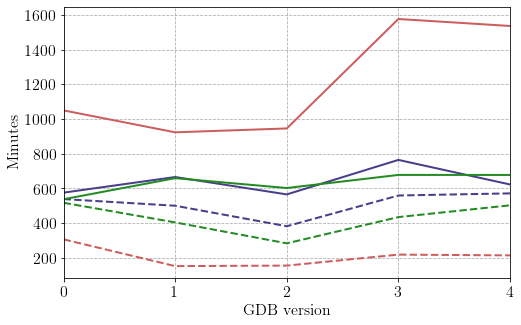

In [159]:
iterations = 0
performance_frame = pd.DataFrame() 
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-performance.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        display(df.head())
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')

        performance_frame[collection + '-Inc'] = df['Total']
        performance_frame[collection + '-Batch'] = df['Batch']
        
    
    

performance_frame.columns = ['SchemEX:Incr', 'SchemEX:Batch', 
             'AttrColl:Incr', 'AttrColl:Batch',
             'TypeColl:Incr', 'TypeColl:Batch']


convert = lambda x: x / 1000 / 60
performance_frame = performance_frame.applymap(convert)  
display(performance_frame)

if appname == 'dyldo_y2019_core':
    if interpolate:
        performance_frame = performance_frame.drop(performance_frame.index[[21,22]])
    else:
        performance_frame.loc[21:22,'SchemEX:Incr':'TypeColl:Batch']=np.nan,np.nan,np.nan,np.nan,np.nan,np.nan
    display(performance_frame)
    
if appname == 'dyldo_y2019_full':
    performance_frame = performance_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')
    
    
ax = performance_frame.plot(logy=False, style = ['--','-','--','-','--','-'], color=['darkslateblue', 'darkslateblue',
                    'forestgreen', 'forestgreen', 'indianred', 'indianred'])
ax.set_xlabel("GDB version")
ax.set_ylabel("Minutes")
#ax.yaxis.set_label_coords(-0.075,.9)
plt.xticks(np.arange(0, iterations, ticks))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=2)

if hide_legend:
    ax.get_legend().remove()

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-performance.pdf', bbox_inches = 'tight')
    


MAX: 0    116444614
dtype: int64
MIN: 0    75220643
dtype: int64


,0
0,82221979
1,82245640
2,82381421
3,106491385
4,105755426
5,82146001
6,98067880
7,101718845
8,105793038
9,100874304


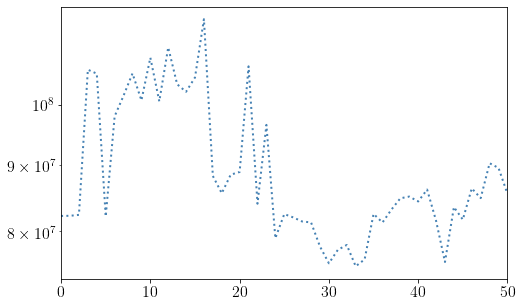

In [160]:
curr_dir = join(data_dir, data_size_dir)
onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".txt")]
onlyfiles = sorted(onlyfiles)

edgecounts = {}
tmp = 0
for filename in onlyfiles:
    # first line: number of types in dataset (not unique)
    # second line: number of edges in dataset (not unique)
    f = open(join(curr_dir,filename), 'r')
    content = f.read().split('\n')
    if len(content) > 2:
        edges = int(content[1])
    else:
        edges = int(content[0])
    if 'iteration' in filename:
        iteration = filename.replace('iteration', '')
        iteration = iteration.replace('-', '')
        iteration = iteration.replace('.txt', '')
        iteration = iteration.replace('.gz', '')
        iteration = iteration.replace('.nq', '')
        iteration = iteration.replace('.nt', '')
               
        edgecounts[int(iteration)] = edges
    else:
        edgecounts[tmp] = edges
        tmp = tmp + 1
        
edgeframe = pd.DataFrame.from_dict(edgecounts, orient='index')
edgeframe = pd.DataFrame.sort_index(edgeframe)
#print(edgeframe)
ax = edgeframe.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'],
             color=['steelblue', 'steelblue', 'steelblue', 'steelblue','indianred','indianred','indianred','indianred']) # 'gray',
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
#plt.xticks(np.arange(0, 50, 5.0))
print("MAX: " + str(edgeframe.max()))
print("MIN: " + str(edgeframe.min()))
display(edgeframe)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=4)
if hide_legend:
    ax.get_legend().remove()

In [161]:
size_frame = pd.DataFrame()
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()
        
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')

        if '|V|' not in size_frame:
            size_frame['|V|'] = df['Imprint links']
            
        size_frame[collection+':|V_vs|'] = df['Schema Elements (SE)']
        size_frame[collection+':|E_vs|'] = df['Schema Relations (SR)']


        
size_frame = size_frame.join(edgeframe,how='left')
display(size_frame.head())


,|V|,schemex:|V_vs|,schemex:|E_vs|,attribute:|V_vs|,attribute:|E_vs|,type:|V_vs|,type:|E_vs|,0
Iteration,,,,,,,,
0,7271943,243423,1303004,50208.0,706205.0,42300.0,0.0,82221979
1,7509702,249691,1413856,54281.0,781832.0,39785.0,0.0,82245640
2,7064987,240266,1333850,52570.0,744073.0,39088.0,0.0,82381421
3,10592783,232566,1405716,56388.0,790516.0,31781.0,0.0,106491385
4,10440827,225972,1370282,55389.0,785474.0,31194.0,0.0,105755426


In [162]:
display(size_frame['|V|'].min())
display(size_frame['|V|'].max())
display(size_frame['|V|'].mean())
display(size_frame['|V|'].std())

6382958

10718848

9097698.909090908

1663543.6874221521

drop the beat


,|V|,SchemEX:|V_vs|,SchemEX:|E_vs|,AttrColl:|V_vs|,AttrColl:|E_vs|,TypeColl:|V_vs|,TypeColl:|E_vs|,|E|
Iteration,,,,,,,,
0,7271943,243423,1303004,50208.0,706205.0,42300.0,0.0,82221979
1,7509702,249691,1413856,54281.0,781832.0,39785.0,0.0,82245640
2,7064987,240266,1333850,52570.0,744073.0,39088.0,0.0,82381421
3,10592783,232566,1405716,56388.0,790516.0,31781.0,0.0,106491385
4,10440827,225972,1370282,55389.0,785474.0,31194.0,0.0,105755426


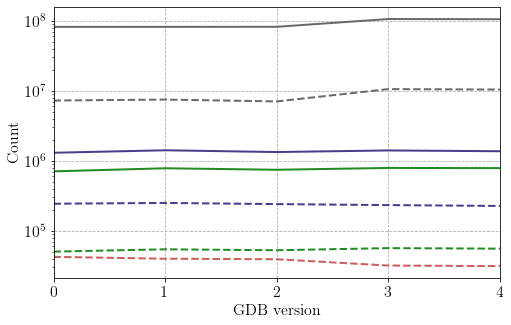

In [163]:
size_frame.columns = ['|V|', 'SchemEX:|V_vs|','SchemEX:|E_vs|' 
                    , 'AttrColl:|V_vs|', 'AttrColl:|E_vs|'
                    , 'TypeColl:|V_vs|', 'TypeColl:|E_vs|', '|E|']

if appname == 'dyldo_y2019_core':
    if interpolate:
        size_frame = size_frame.drop(size_frame.index[[21,22]])
    else:
        size_frame.loc[21:22,'|V|':'|E|']=np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan
   

if appname == 'dyldo_y2019_full':
    size_frame = size_frame.head()
    iterations = 5
    ticks = 1.0
    print('drop the beat')
    
  
display(size_frame)

sorted_frame = size_frame[['SchemEX:|V_vs|', 'SchemEX:|E_vs|' 
                    , 'AttrColl:|V_vs|', 'AttrColl:|E_vs|'
                    , 'TypeColl:|V_vs|', 'TypeColl:|E_vs|', '|V|', '|E|']]

sorted_frame.columns=['SchemEX:$|V_{vs}|$', 'SchemEX:$|E_{vs}|$' 
                    , 'AttrColl:$|V_{vs}|$', 'AttrColl:$|E_{vs}|$'
                    , 'TypeColl:$|V_{vs}|$', 'TypeColl:$|E_{vs}|$', '$|V|$', '$|E|$']

ax = sorted_frame.plot(logy=True, style = ['--','-','--','-','--','-','--','-'], 
                       color=['darkslateblue', 'darkslateblue',
                             'forestgreen','forestgreen',
                             'indianred','indianred', 'dimgray', 'dimgray'])#,yticks=([math.exp(w) for w in np.arange(1, 10, 2)]))
#ax.set_ylim([2500, 80000])color=['dimgray', 'darkslateblue']
#plt.yticks(np.arange(0, iterations, 5.0))
#plt.
plt.xticks(np.arange(0, iterations, ticks))
ax.set_xlabel("GDB version")
ax.set_ylabel("Count")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=3)
if hide_legend:
    ax.get_legend().remove()
    
plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-sizes.pdf',  bbox_inches = 'tight')

Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')
Index(['NewlyObservedSchema (SE_new)', 'DeletedSchemaStructures (SE_del)',
       'ChangedSchemaStructures (SE_mod)', 'InstanceNotChanged (PE_mod)'],
      dtype='object')


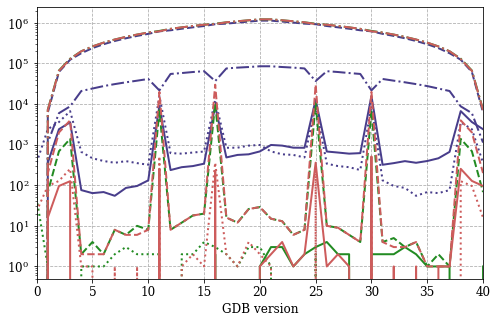

In [9]:
frames = [None, None, None]
i = 0
iterations = 0
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-changes.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()

        #del df['NewlyObservedSchema (SE_new)']
        #del df['DeletedSchemaStructures (SE_del)']

        
        del df['TotalNumberOfNewInstances'] 
        del df['InstanceAddedWithKnownSchema (PE_add)']
        del df['InstancesDeleted (PE_del)']
        del df['ChangedSchemaStructuresBecauseOfNeighbor'] 
        del df['PayloadEntriesAdded'] 
        del df['PayloadEntriesRemoved'] 
        del df['InstanceToSchemaLinksAdded'] 
        del df['InstanceToSchemaLinksRemoved'] 

        del df['TotalNumberOfChangedPayloadElements (real PE_mod)']
        
        del df['TotalNumberOfSchemaElementsWritten']
        del df['TotalNumberOfSchemaElementsDeleted']
        #del df['InstanceNotChanged (PE_mod)']
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')
        print(df.columns)
        df.columns = [collection+'ADD', collection+'DEL', collection+'MOD', collection+'unchanged']    #'Modified pe(v)'
        
        #df.columns = [collection+'MOD-ELEM', collection+'Unchanged v', collection+'ADD-ELEM', collection+'DEL-ELEM']    #'Modified pe(v)'
        #df = df[[collection+'ADD-ELEM', collection+'DEL-ELEM', collection+'MOD-ELEM',collection+'Unchanged v']] #'Modified pe(v)'
        frames[i] = df
        i = i + 1
        
df = pd.concat(frames, sort=False)


df.columns = ['SchemEX:ADD', 'SchemEX:DEL', 'SchemEX:MOD','SchemEX:PAY',
             'AttrColl:ADD', 'AttrColl:DEL', 'AttrColl:MOD','AttrColl:PAY',
             'TypeColl:ADD', 'TypeColl:DEL', 'TypeColl:MOD','TypeColl:PAY']
ax = df.plot(logy=True, style = [':','-','--','-.',':','-','--','-.',':','-','--','-.'], 
             color=['darkslateblue', 'darkslateblue', 'darkslateblue', 'darkslateblue', 
                    'forestgreen', 'forestgreen', 'forestgreen','forestgreen',
                   'indianred', 'indianred', 'indianred','indianred'])
#ax.set_ylabel("Quantity")
#ax.yaxis.set_label_coords(-0.015,1.0)
plt.xticks(np.arange(0, iterations, 5.0))
ax.set_xlabel("GDB version")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.325), shadow=True, ncol=3)

if hide_legend:
    ax.get_legend().remove()

plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-changes.png', bbox_inches = 'tight')